# Evaluating deformation model on point sets

In this notebook, we try to understand what kinds of motion various deformation models are capable of modeling by fitting them to random and carefully chosen point sets.

## Imports and magics

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import ipywidgets as ipyw
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

## Create random number generator

In [3]:
rng = np.random.default_rng(1993)

## Create two random point sets

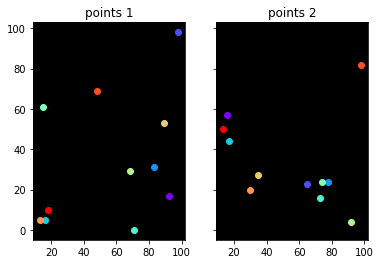

In [6]:
n_pts = 11
x_min = 0 
x_max = 100

x_1 = rng.integers(x_min, x_max, (n_pts, 3))
x_2 = rng.integers(x_min, x_max, (n_pts, 3))

fig, (ax_1, ax_2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax_1.set_facecolor('black')
ax_1.set_title('points 1')
ax_2.set_facecolor('black')
ax_2.set_title('points 2')

colors = cm.rainbow(np.linspace(0, 1, n_pts))

for idx in range(n_pts):
    
    ax_1.plot(x_1[idx, 0], x_1[idx, 1], color=colors[idx], marker='o')
    ax_2.plot(x_2[idx, 0], x_2[idx, 1], color=colors[idx], marker='o')

## Fit polynomial regression model to point set

Polynomial regression models compute a linear regression in a polynomial basis space. Because finding an exact solution (i.e. perfect fit) requires an invertible design matrix, we can only do this if the number of points is less than or equal to the number of linear coefficients. For a quadratic model mapping 3D space to 3D space, we have 10 parameters, so exact solutions will not be possible for point sets more than 10 points.

MSE: 111.04916531125694


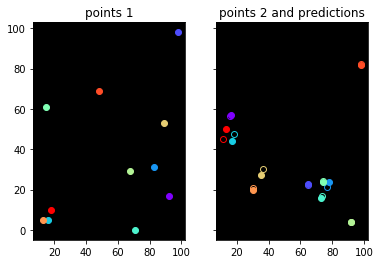

In [7]:
# Fit model to point clouds
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=True)),
    ('linear', LinearRegression(fit_intercept=False))
])
model.fit(x_1, x_2) 

# Compute MSE
x_pred = model.predict(x_1)
sq_err = np.sum((x_pred - x_2) ** 2, 1)
mse = np.mean(sq_err)
print(f'MSE: {mse}')

# Plot point clouds and predicted points
fig, (ax_1, ax_2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax_1.set_facecolor('black')
ax_1.set_title('points 1')
ax_2.set_facecolor('black')
ax_2.set_title('points 2 and predictions')

colors = cm.rainbow(np.linspace(0, 1, n_pts))
for idx in range(n_pts):
    ax_1.plot(x_1[idx, 0], x_1[idx, 1], color=colors[idx], marker='o')
    ax_2.plot(x_2[idx, 0], x_2[idx, 1], color=colors[idx], marker='o')
    ax_2.plot(x_pred[idx, 0], x_pred[idx, 1], color=colors[idx], marker='o', fillstyle='none')